In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.append('../tools')
from tools import logsig, deriv_logsig

In [68]:
layer_sizes = np.array([1, 2, 1])
transfer_functions = np.array([logsig, logsig])
deriv_transfer_functions = np.array([deriv_logsig, deriv_logsig])

w_list = [np.random.rand(layer_sizes[i+1], layer_sizes[i]) for i in range(len(layer_sizes)-1)]
b_list = [np.random.rand(s, 1) for s in layer_sizes[1:]]
n_list = [np.empty((s, 1), dtype=float) for s in layer_sizes[1:]]
a_list = [np.empty((s, 1), dtype=float) for s in layer_sizes[1:]]
s_list = [np.empty((s, 1), dtype=float) for s in layer_sizes[1:]]

In [28]:
def get_output(X):
    # Get output for initial layer
    n_list[0] = np.matmul(w_list[0], X) + b_list[0]
    a_list[0] = transfer_functions[0](n_list[0])
    
    # Get output for the rest of the layers
    for i in range(1, len(w_list)):
        n_list[i] = np.matmul(w_list[i], a_list[i-1]) + b_list[i]
        a_list[i] = transfer_functions[i](n_list[i])

In [72]:
def get_expected_output(X):
    return logsig(np.dot(logsig(X * np.array([10, 10]) + np.array([-5, 5])), np.array([1, 1])) + -1)

In [73]:
vec_get_y = np.vectorize(get_expected_output)

In [74]:
inputs = np.linspace(-2, 2, 82)
outputs = vec_get_y(x)

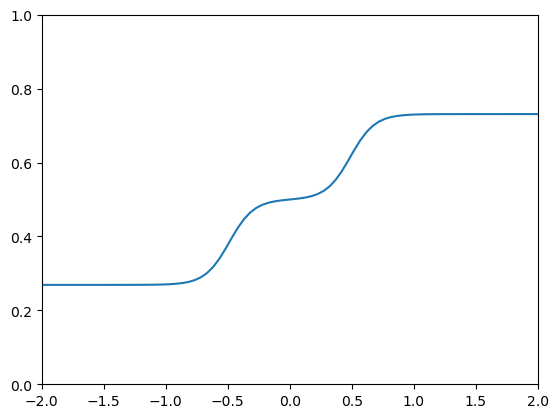

In [75]:
plt.xlim(-2, 2)
plt.ylim(0, 1)
plt.plot(x, y)

In [102]:
def fill_F_dot(layer_number):
    f = np.zeros((layer_sizes[layer_number], layer_sizes[layer_number]))
    np.fill_diagonal(f, transfer_functions[layer_number-1](n_list[layer_number-1]).reshape(layer_sizes[layer_number]))
    return f

In [103]:
def calc_sensibilities(X, Y):
    get_output(X)
    s_list[-1] = -2 * np.matmul(fill_F_dot(-1), Y - a_list[-1]))
    
    for i in range(len(s_list)-1, -1, -1)

[[0.65950807]]


In [105]:
for i in range(3, -1, -1):
    print(i)

3
2
1
0
